### Import module

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 70.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [3]:
cd '/content/drive/MyDrive/dataset'

/content/drive/MyDrive/dataset


In [4]:
import pandas as pd
from anfis import fis_parameters, ANFIS
from sklearn.preprocessing import LabelEncoder, MaxAbsScaler, StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

### Loads and preprocessing Datasets

### Normalize Data

In [5]:
df = pd.read_excel("dataset01.xlsx")
df_1 = df.drop(columns=['Bulan'], axis=1)
norms = MaxAbsScaler().fit_transform(df_1)
pd.DataFrame(data=norms, columns=df_1.columns)

,pelanggan-23,daya-23,pelanggan-22,daya-22,pelanggan-21,daya-21,pelanggan-20,daya-20,pelanggan-19,daya-19
0,0.934315,0.995556,1.000000,0.995837,1.000000,0.995717,1.000000,0.996628,1.000000,0.958089
1,0.932843,0.996627,0.998308,0.995395,0.998020,0.996148,0.998668,0.998202,0.999124,0.957695
2,0.930870,0.996261,0.996923,0.996104,0.996519,0.996027,0.997721,0.998926,0.998101,0.958902
3,0.929751,0.996869,0.995477,0.999631,0.994869,0.996450,0.996507,1.000000,0.996932,0.958688
4,0.928603,0.996084,0.993815,0.999004,0.992768,0.996609,0.995116,0.998581,0.996202,0.959944
5,0.927896,0.996913,0.990708,0.998169,0.990248,0.996848,0.996122,0.998241,0.995618,0.981269
6,0.926306,0.995990,0.988431,0.996532,0.987937,0.996482,0.996182,0.997647,0.994420,0.982201
7,0.924893,0.997538,0.986154,0.996691,0.986407,0.997324,0.995027,0.998292,0.993310,0.982544
8,1.000000,0.981637,0.984462,0.999109,0.983856,0.995429,0.993577,0.999160,0.916533,1.000000
9,0.922037,0.998714,0.982031,0.997644,0.981995,0.995879,0.992126,0.998767,0.990651,0.982809


In [6]:
selc =2
# normscaler = df.drop(columns=['Bulan'])
X = norms[:,0:selc]
Y = norms[:,-1]
X.shape

(12, 2)

In [7]:
X

array([[0.93431474, 0.99555563],
       [0.93284263, 0.99662659],
       [0.93087001, 0.99626061],
       [0.92975121, 0.99686882],
       [0.92860297, 0.99608407],
       [0.92789636, 0.9969132 ],
       [0.92630649, 0.99599043],
       [0.92489327, 0.99753803],
       [1.        , 0.98163718],
       [0.92203739, 0.99871379],
       [0.92044752, 1.        ],
       [0.92044752, 1.        ]])

### Cross-Validation : separate datasets into (`X_train`, `X_test`, `y_train`, `y_test`)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                      X, Y, test_size=0.2, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')
# clf.fit(X_train, y_train)
# print(clf.score(X_test, y_test))

X_train shape: (9, 2)
X_test shape: (3, 2)
y_train shape: (9,)
y_test shape: (3,)


### train ANFIS

In [9]:
param = fis_parameters(
            n_input = selc,                # no. of Regressors
            n_memb = 3,                 # no. of fuzzy memberships
            batch_size = 1,            # 16 / 32 / 64 / ...
            memb_func = 'gaussian',      # 'gaussian' / 'gbellmf' / 'sigmoid'
            optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,
                                                beta_1=0.99,
                                                 beta_2=0.999,
                                                 epsilon=1e-07,),   # sgd / adam / ...
            loss = tf.keras.losses.MeanAbsolutePercentageError(),
            # loss = 'huber_loss',               # mse / mae / huber_loss / mean_absolute_percentage_error / ...
            n_epochs = 80            # 10 / 25 / 50 / 100 / ...
            )

fis = ANFIS(n_input = param.n_input,
                        n_memb = param.n_memb,
                        batch_size = param.batch_size,
                        memb_func = param.memb_func,
                        name = 'myanfis'
                        )
  # compile modelm
fis.model.compile(optimizer=param.optimizer,
                      loss=param.loss,
                      # metrics=['accuracy']
                      metrics=[tf.keras.metrics.MeanAbsolutePercentageError(),
                               tf.keras.metrics.RootMeanSquaredError()]  # ['mae', 'mse']
                      )

history = fis.fit(X_train, y_train,
                      epochs=param.n_epochs,
                      batch_size=param.batch_size,
                      validation_data = (X_test, y_test),
                       #callbacks = [tensorboard_callback]  # for tensorboard
                      )
histories = []
histories.append(history)

Epoch 1/80
9/9 [==============================] - 7s 124ms/step - loss: 92.9285 - mean_absolute_percentage_error: 92.9285 - root_mean_squared_error: 0.9063 - val_loss: 91.2656 - val_mean_absolute_percentage_error: 91.2656 - val_root_mean_squared_error: 0.8899
Epoch 2/80
9/9 [==============================] - 0s 21ms/step - loss: 86.0868 - mean_absolute_percentage_error: 86.0868 - root_mean_squared_error: 0.8398 - val_loss: 84.4769 - val_mean_absolute_percentage_error: 84.4769 - val_root_mean_squared_error: 0.8238
Epoch 3/80
9/9 [==============================] - 0s 33ms/step - loss: 79.3832 - mean_absolute_percentage_error: 79.3832 - root_mean_squared_error: 0.7744 - val_loss: 77.8632 - val_mean_absolute_percentage_error: 77.8632 - val_root_mean_squared_error: 0.7594
Epoch 4/80
9/9 [==============================] - 0s 23ms/step - loss: 72.8912 - mean_absolute_percentage_error: 72.8912 - root_mean_squared_error: 0.7107 - val_loss: 71.4120 - val_mean_absolute_percentage_error: 71.4120 -

### Loss training and Loss validation data

In [10]:
fis.model.summary()

Model: "myanfis"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputLayer (InputLayer)     [(1, 2)]                     0         []                            
                                                                                                  
 fuzzyLayer (FuzzyLayer)     (1, 3, 2)                    12        ['inputLayer[0][0]']          
                                                                                                  
 ruleLayer (RuleLayer)       (1, 9)                       0         ['fuzzyLayer[0][0]']          
                                                                                                  
 normLayer (NormLayer)       (1, 9)                       0         ['ruleLayer[0][0]']           
                                                                                            

In [11]:
# [i for i in history.history['val_loss']]
err = history.history['loss'][param.n_epochs - 1]
val_err = history.history['val_loss'][param.n_epochs-1]
mape = history.history['mean_absolute_percentage_error'][param.n_epochs-1]
val_mape = history.history['val_mean_absolute_percentage_error'][param.n_epochs-1]
rmse = history.history['root_mean_squared_error'][param.n_epochs-1]
val_rmse = history.history['val_root_mean_squared_error'][param.n_epochs-1]

print(f'type of membership : {param.memb_func}')
print(f'loss train on epochs {param.n_epochs} :{err}')
print(f'loss val on param.n_epochs {param.n_epochs} :{val_err}')
print(f'mape on param.n_epochs {param.n_epochs} :{mape}')
print(f'val mape on param.n_epochs {param.n_epochs} :{val_mape}')
print(f'rmse on param.n_epochs {param.n_epochs} :{rmse}')
print(f'val rmse on param.n_epochs {param.n_epochs} :{val_rmse}')

type of membership : gaussian
loss train on epochs 80 :2.1841840744018555
loss val on param.n_epochs 80 :2.4509060382843018
mape on param.n_epochs 80 :2.1841840744018555
val mape on param.n_epochs 80 :2.4509060382843018
rmse on param.n_epochs 80 :0.027668939903378487
val rmse on param.n_epochs 80 :0.02489233762025833


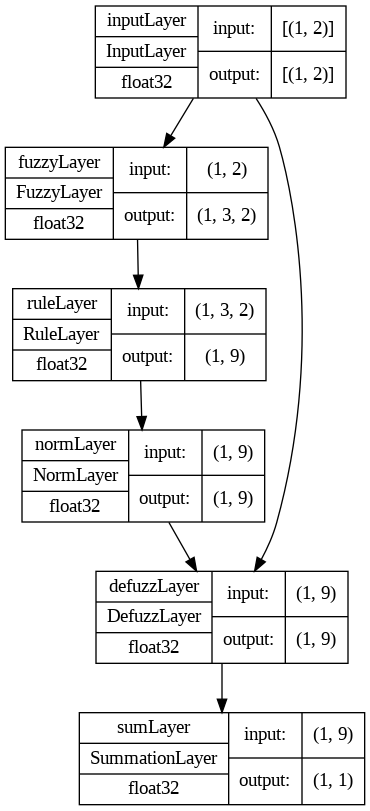

In [12]:
tf.keras.utils.plot_model(fis.model, show_dtype=True, show_shapes=True)

In [13]:
fis.update_weights()

### plotting Membership functions

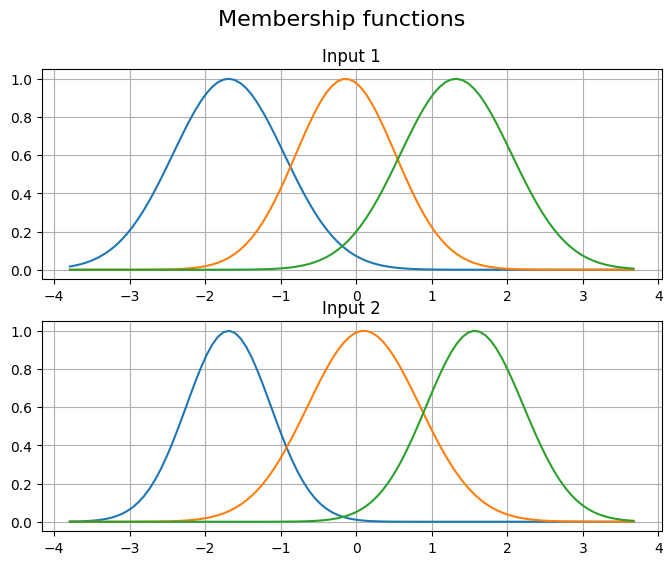

In [14]:
fis.plotmfs()

### plotting loss

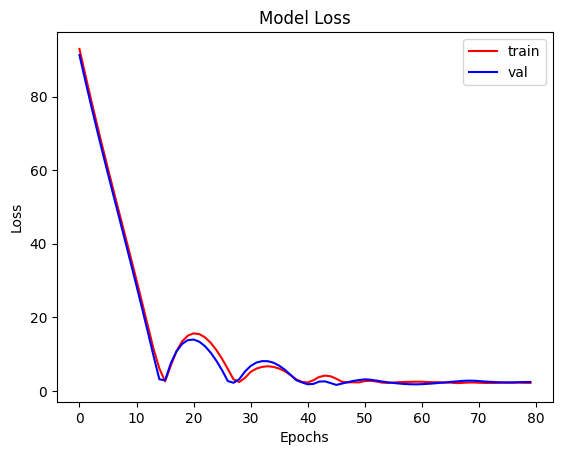

In [15]:
#Plot the loss history
# plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

### Plotting Accuracy MAPE and RMSE

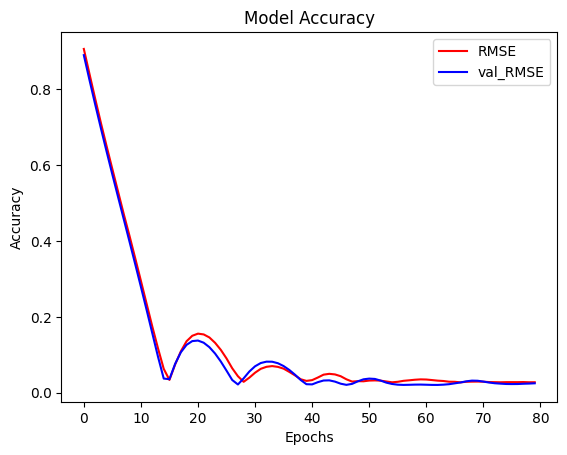

In [16]:
# plt.figure(figsize=(12, 5))
plt.plot(history.history['root_mean_squared_error'], color='r')
plt.plot(history.history['val_root_mean_squared_error'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['RMSE', 'val_RMSE'])
plt.show()

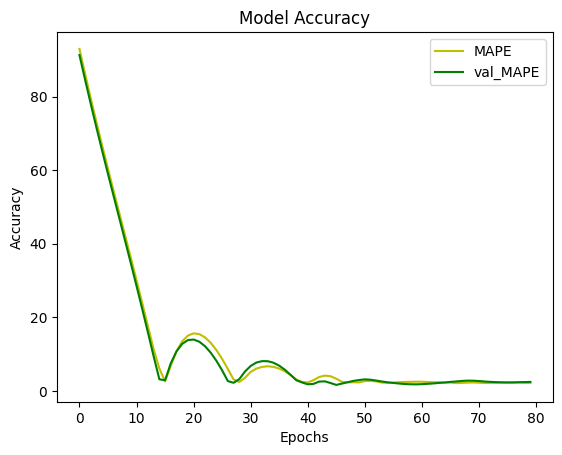

In [17]:
plt.plot(history.history['mean_absolute_percentage_error'], color='y')
plt.plot(history.history['val_mean_absolute_percentage_error'], color='g')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['MAPE', 'val_MAPE'])
plt.show()

### Results prediction of Real data

In [18]:
y_pred = fis(X_train)
co=np.concatenate((y_train.reshape(-1,1), y_pred), axis=1)
column_values= ['Real', 'Prediction']
pd.DataFrame(co, columns=column_values)

9/9 [==============================] - 0s 2ms/step


,Real,Prediction
0,1.000000,1.064367
1,0.981269,0.963193
2,0.958902,0.967527
3,0.957695,0.970865
4,0.983725,0.953107
5,0.959944,0.963832
6,0.982544,0.958782
7,0.958688,0.966111
8,0.982201,0.960134


In [19]:
y1_pred = fis(X)
co = np.concatenate((Y.reshape(-1,1), y1_pred), axis=1)
column_values= ['Real', 'Prediction']
pd.DataFrame(co, columns=column_values)

12/12 [==============================] - 0s 2ms/step


,Real,Prediction
0,0.958089,0.972558
1,0.957695,0.970865
2,0.958902,0.967527
3,0.958688,0.966111
4,0.959944,0.963832
5,0.981269,0.963193
6,0.982201,0.960134
7,0.982544,0.958782
8,1.000000,1.064367
9,0.982809,0.954907


In [20]:
df_1.describe()

,pelanggan-23,daya-23,pelanggan-22,daya-22,pelanggan-21,daya-21,pelanggan-20,daya-20,pelanggan-19,daya-19
count,12.000000,1.200000e+01,12.000000,1.200000e+01,12.000000,1.200000e+01,12.000000,1.200000e+01,12.000000,1.200000e+01
mean,31696.166667,2.547315e+08,32160.166667,2.537888e+08,32961.833333,2.526149e+08,33615.500000,2.519511e+08,33825.583333,2.486553e+08
std,731.095919,1.219905e+06,242.155034,3.992791e+05,250.940353,3.761359e+05,112.190179,2.242756e+05,783.293102,3.687046e+06
min,31263.000000,2.510542e+08,31785.000000,2.532004e+08,32564.000000,2.522454e+08,33409.000000,2.514550e+08,31372.000000,2.444826e+08
25%,31389.750000,2.547430e+08,31975.250000,2.534625e+08,32771.500000,2.523876e+08,33554.750000,2.518596e+08,33898.500000,2.447770e+08
50%,31528.000000,2.549187e+08,32161.000000,2.538392e+08,32961.500000,2.525080e+08,33636.000000,2.519714e+08,34058.500000,2.506196e+08
75%,31633.750000,2.551960e+08,32364.750000,2.541252e+08,33167.750000,2.526350e+08,33676.250000,2.521010e+08,34134.000000,2.508576e+08
max,33965.000000,2.557504e+08,32500.000000,2.543718e+08,33325.000000,2.534036e+08,33784.000000,2.523059e+08,34229.000000,2.552824e+08


In [21]:
df_1[['pelanggan-23','daya-23']]

,pelanggan-23,daya-23
0,31734,254613800
1,31684,254887700
2,31617,254794100
3,31579,254949650
4,31540,254748950
5,31516,254961000
6,31462,254725000
7,31414,255120800
8,33965,251054150
9,31317,255421500


In [22]:
def denormalize(x, max, min):
  return (x * (max - min) + min)

maxP, minP = df_1['pelanggan-23'].max(), df_1['pelanggan-23'].min()
maxD, minD = df_1['daya-23'].max(), df_1['daya-23'].min()
pelanggan = denormalize(y1_pred, maxP, minP)
daya = denormalize(y1_pred, maxD, minD)
concate1 = np.concatenate((pelanggan, daya), axis=1)
# concate2 = np.concatenate(df_1['pelanggan-23'], df_1['daya-23'])

pd.DataFrame(concate1,  columns=['pelanggan 2024', 'daya 2024'])

,pelanggan 2024,daya 2024
0,33890.851562,2.556216e+08
1,33886.277344,2.556136e+08
2,33877.257812,2.555979e+08
3,33873.429688,2.555913e+08
4,33867.273438,2.555806e+08
5,33865.546875,2.555776e+08
6,33857.281250,2.555632e+08
7,33853.628906,2.555569e+08
8,34138.921875,2.560527e+08
9,33843.160156,2.555387e+08


### graphic of distribute data on the real and prediction data for datatest

3/3 [==============================] - 0s 3ms/step


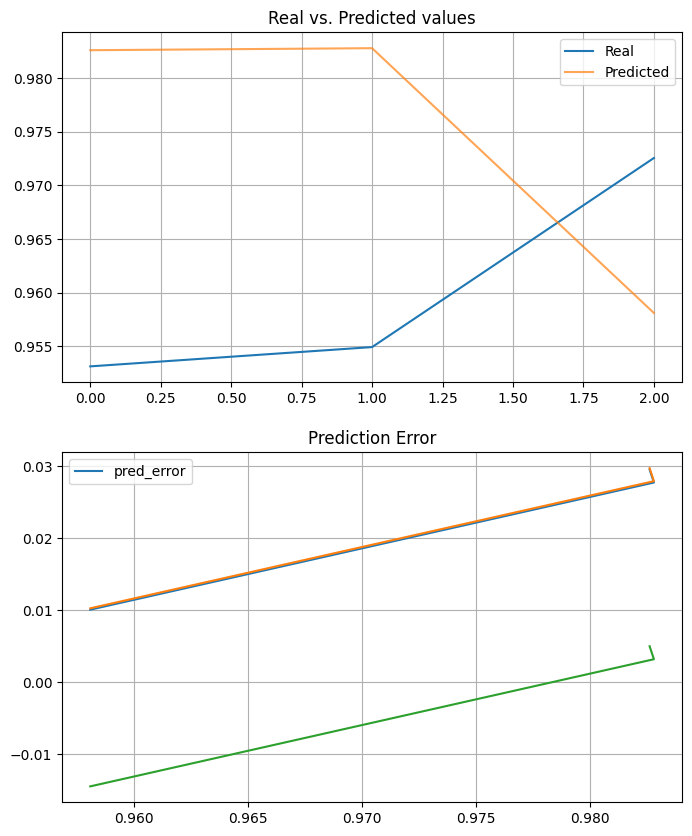

In [23]:
column_values= ['Real', 'Prediction']
df = pd.DataFrame(data = co,columns = column_values)
df.reset_index(inplace = True)

# ## Evaluate Model
# fis.model.evaluate(X_test, y_test)
plot_prediction=True
if plot_prediction:
    y_pred = fis(X_test)
    f, axs = plt.subplots(2, 1, figsize=(8, 10))
    # f.suptitle(f'{gen.get_data_name(data_id)} time series', size=16)
    axs[0].plot(y_pred)
    axs[0].plot(y_test, alpha=.7)
    axs[0].legend(['Real', 'Predicted'])
    axs[0].grid(True)
    axs[0].set_title('Real vs. Predicted values')
    axs[1].plot(y_test, y_test - y_pred)
    axs[1].legend(['pred_error'])
    axs[1].grid(True)
    axs[1].set_title('Prediction Error')
    plt.show()



MAPE Score : 0.024509058111451893
RMSE Score : 0.024892331760622867
MAE Score : 0.023961382351516385


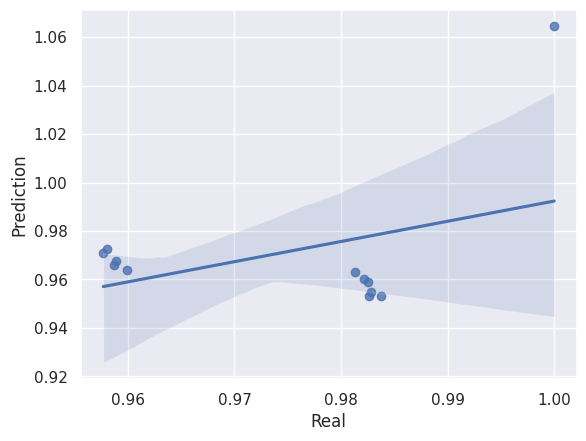

In [24]:
import seaborn as sns

from sklearn.metrics import root_mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
# from tensorflow.keras.metrics import mean_absolute_percentage_error
print("MAPE Score :",mean_absolute_percentage_error(y_test, y_pred))
print("RMSE Score :",root_mean_squared_error(y_test, y_pred))
print("MAE Score :",mean_absolute_error(y_test, y_pred))
sns.set_theme(color_codes=True)
ax = sns.regplot(x="Real", y="Prediction", marker='o', data=df)